In [1]:
%pylab

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline

In [8]:
import phenom
import phenom.plot

import pickle
import pandas as pd

In [30]:
s = pickle.load(open('temp/samples/posterior_0.pkl'))
design = pd.read_csv('temp/design.csv', index_col=0)

design.head()

,Intercept,"C(strain, levels=[""parent"", ""mutant""])[T.mutant]",Condition=stress,Condition=stress.1
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [16]:
s.keys()

[u'lengthscale',
 u'alpha',
 u'sigma',
 u'f_eta',
 u'f',
 u'df',
 u'lp__',
 'f-native',
 'df-native']

In [17]:
s['f-native'].shape

(4000, 4, 25)

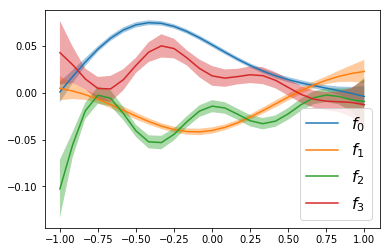

In [28]:
for i in range(4):
    phenom.plot.function.interval(np.linspace(-1, 1, 25), s['df-native'][:,i,:], label='$f_%d$'%i)
    
plt.legend(fontsize=16)